# 1 Modelling the external data
## Case b) Thermal emission only

**Author:** Hannu Parviainen<br>
**Last edited:** 21.11.2021

Here we model the KELT-1 light curves observed with TESS (Beatty20, XX20), LBT (Beatty), and Spitzer (Beatty2019, Beatty2017) using a full phase curve model that includes the transit, secondary eclipse, thermal emission, reflection, ellipsoidal variations and Doppler boosting. 

The model is implemented by `src.priordatalpf.JointLPF`, which inherits all its functionality from `pytransit.lpf.PhaseCurveLPF`.

In this base case we don't constrain the geometric albedo or the planet's day-side flux ratio (we do this in the later cases). These two parameters should be linearly correlated since they are the main parameters affecting the eclipse depth, but it is useful to see their joint posterior.

In [1]:
%run src/init_threading_for_multiprocessing.py

In [2]:
%matplotlib inline

In [3]:
from multiprocessing import Pool
from corner import corner
from numpy.random import permutation
from src import ExternalDataLPF, read_mcmc

In [4]:
lpf = ExternalDataLPF('b')

In [6]:
def lnposterior(pv):
    return lpf.lnposterior(pv)

pool = Pool(processes=30)

Global optimisation:   0%|          | 0/1 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/1 [00:00<?, ?it/s]

Run 1/1:   0%|          | 0/50 [00:00<?, ?it/s]

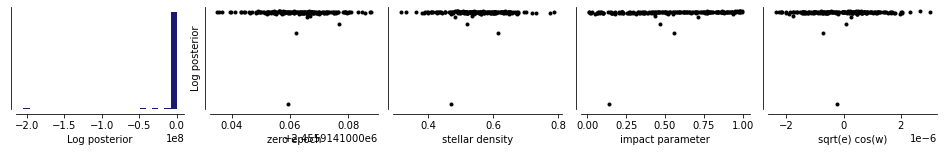

In [11]:
how_to_start = 'start_from_scenario_a'
#how_to_start = 'start_from_scratch'
#how_to_start = 'continue'
npop = 200

if how_to_start is 'start_from_scratch':
    lpf.optimize_global(45000, npop)
    lpf.sample_mcmc(50, thin=10, repeats=1, save=False, pool=pool, lnpost=lnposterior, vectorize=False)
else:
    if how_to_start is 'continue':
        df = read_mcmc(f'results/{lpf.name}.nc')
    elif how_to_start is 'start_from_scenario_a':
        df = read_mcmc('results/01a_ext_emission_and_theoretical_ev.nc')
    else:
        raise NotImplementedError
    lpf.optimize_global(1, npop, pool=pool, lnpost=lnposterior, vectorize=False)
    sids = permutation(df.values.shape[0])[:lpf.de.n_pop]
    starting_population = df.values[sids, :-1].copy()
    lpf.sample_mcmc(50, thin=10, repeats=1, save=False, population=starting_population, 
                   pool=pool, lnpost=lnposterior, vectorize=False)


In [12]:
lpf.sample_mcmc(5000, thin=50, repeats=10, save=True, pool=pool, lnpost=lnposterior, vectorize=False)

MCMC sampling:   0%|          | 0/10 [00:00<?, ?it/s]

Run 1/10:   0%|          | 0/5000 [00:00<?, ?it/s]

Run 2/10:   0%|          | 0/5000 [00:00<?, ?it/s]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Run 5/10:   0%|          | 0/5000 [00:00<?, ?it/s]

Run 6/10:   0%|          | 0/5000 [00:00<?, ?it/s]

Run 7/10:   0%|          | 0/5000 [00:00<?, ?it/s]

Run 8/10:   0%|          | 0/5000 [00:00<?, ?it/s]

Run 9/10:   0%|          | 0/5000 [00:00<?, ?it/s]

Run 10/10:   0%|          | 0/5000 [00:00<?, ?it/s]

In [39]:
df = lpf.posterior_samples(derived_parameters=False)

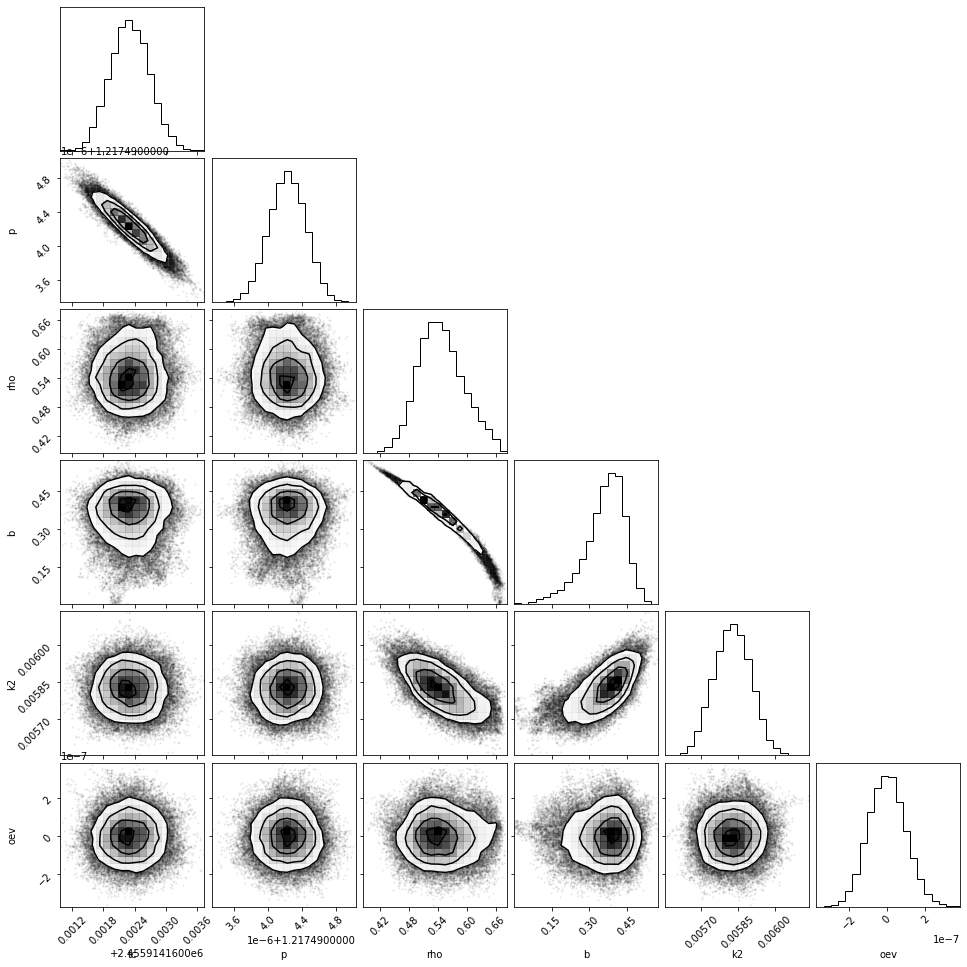

In [42]:
corner(df.iloc[:,[0,1,2,3,6,7]]);

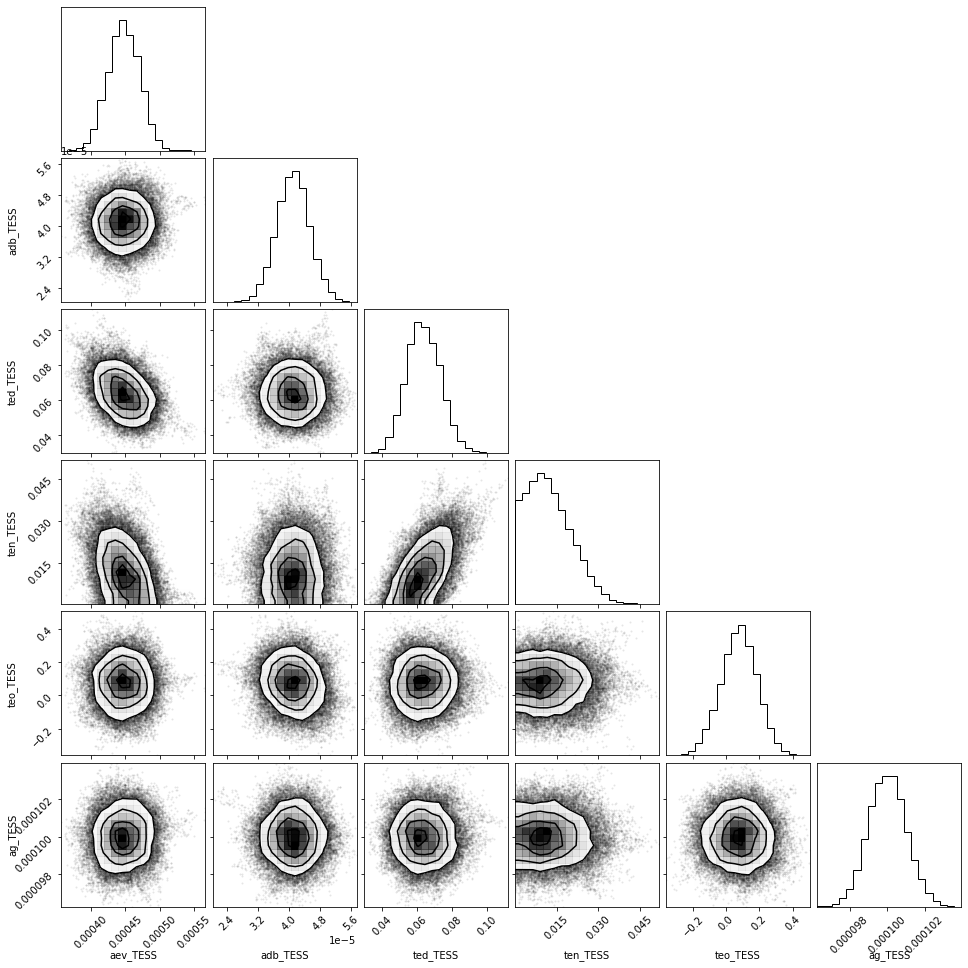

In [43]:
corner(df.iloc[:,8:14]);

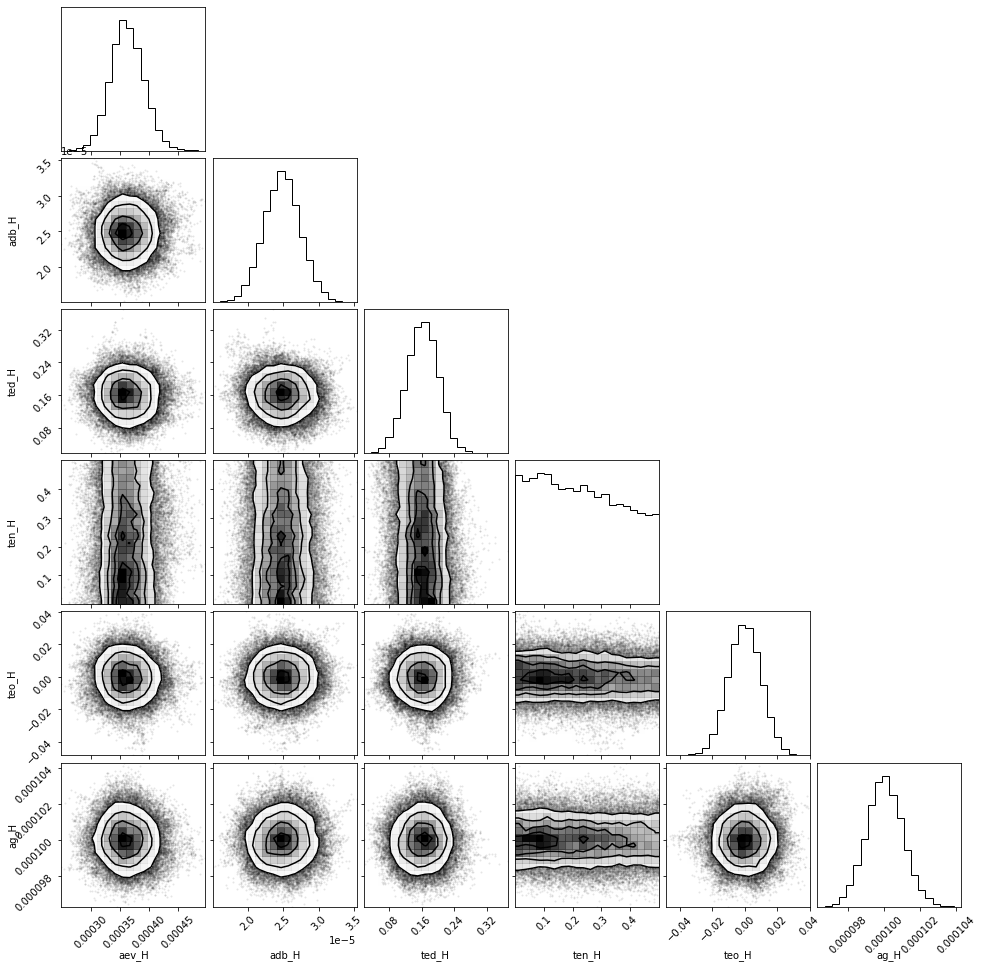

In [44]:
corner(df.iloc[:,14:20]);

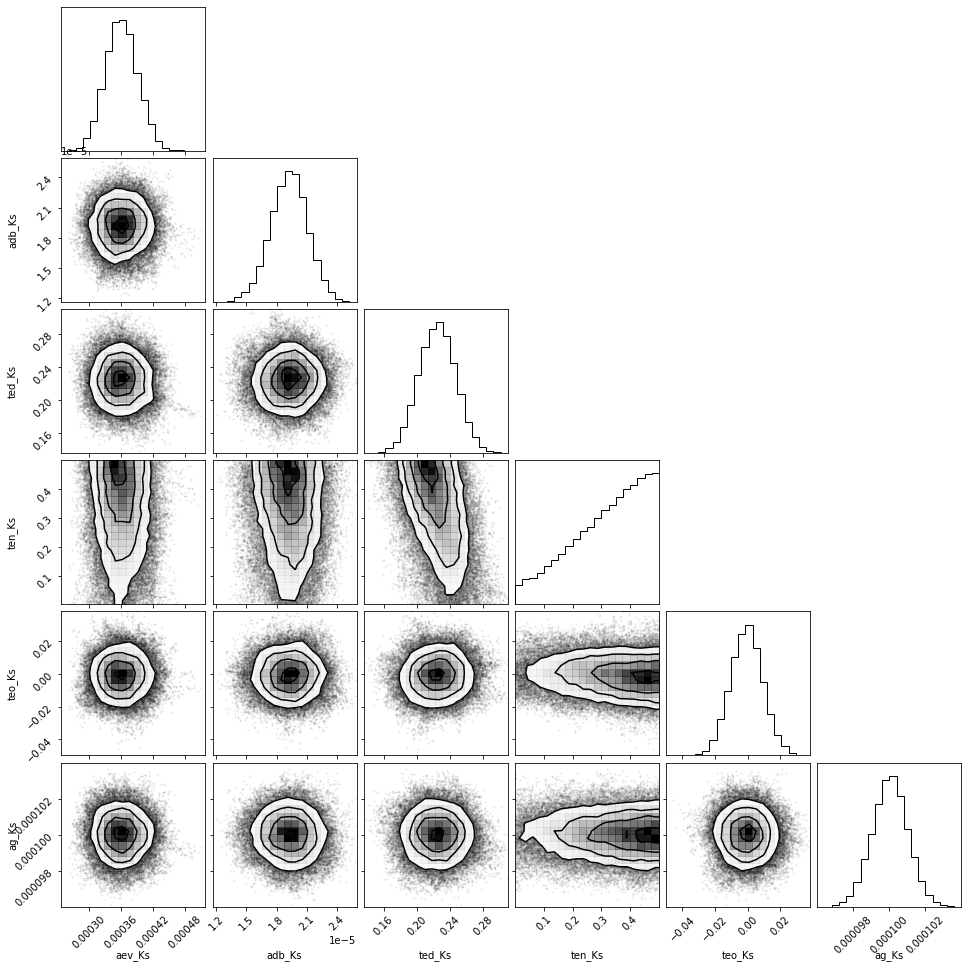

In [45]:
corner(df.iloc[:,20:26]);

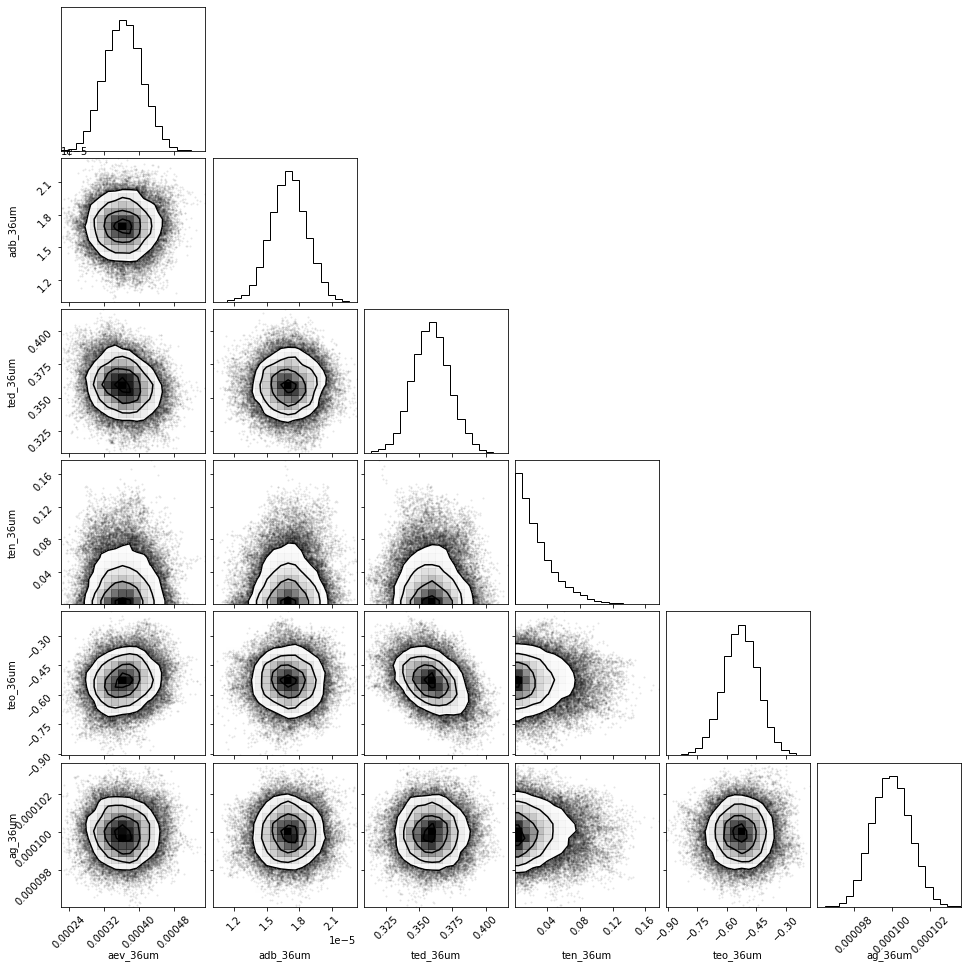

In [46]:
corner(df.iloc[:,26:32]);

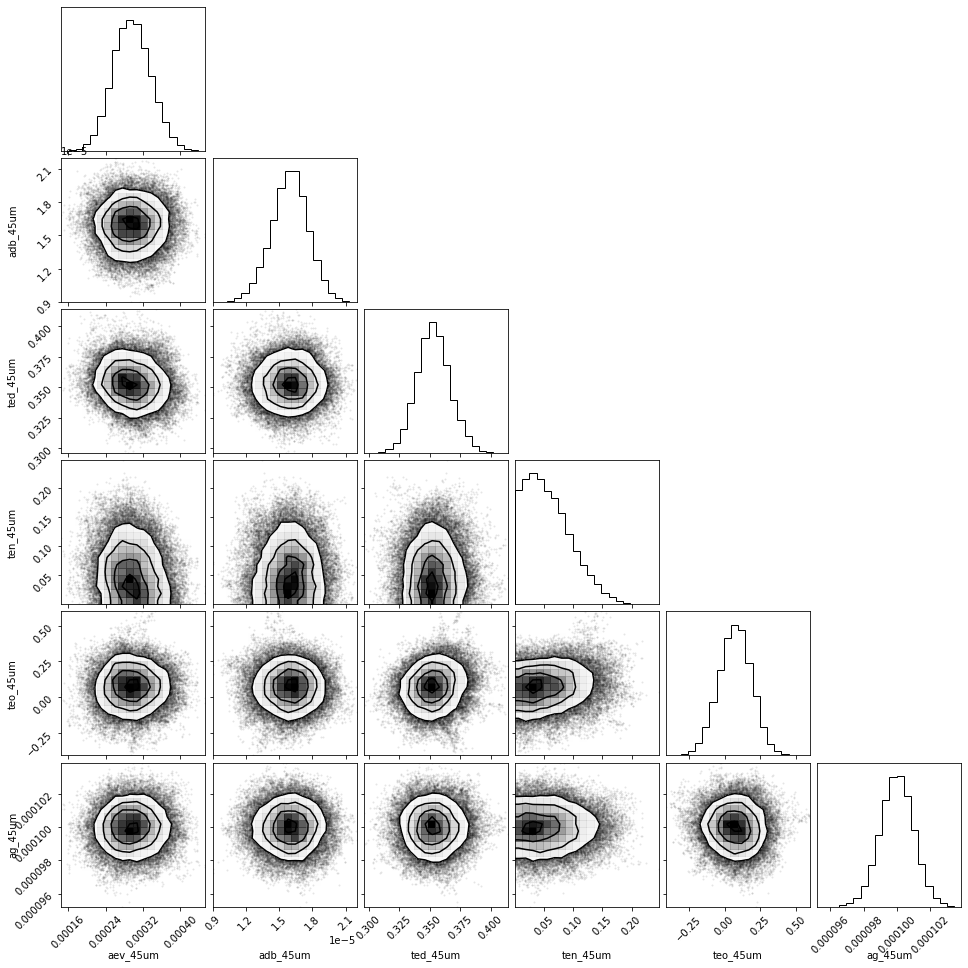

In [47]:
corner(df.iloc[:,32:38]);

---

<center>&copy 2021 Hannu Parviainen</center>